In [1]:
'''
This program is used to explore the groundstate conformer data for the 
BigData1 paper.
'''
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import corner

In [29]:
df_ground = pd.read_csv('/Users/mpettyjo/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1_GroundState.csv') # load groundstate csv file

,Unnamed: 0.1,Unnamed: 0,Formula,SMILES,# Atoms,Conf#,Rotamer Degeneracy,Relative Energy [kJ/mol],BW Percent at 10 K,BW Percent at 50 K,...,mu_b [D],mu_c [D],mu_tot [D],mu_amu_bmu_c,A [cm-1],B [cm-1],C [cm-1],Flag1,Flag2,Flag3
5,5,5,C2H2O_2,C=C=O,5,CONF1,1,0.0,100.0,100.0,...,0.000035,-4.117225e-05,1.485321,2.146532e-09,9.445039,0.343714,0.331645,Conformer Retained,Present,Complete
9,9,9,C2H2S_2,C=C=S,5,CONF1,1,0.0,100.0,100.0,...,0.000004,1.216074e-07,1.108340,4.859450e-13,9.593856,0.188980,0.185330,Conformer Retained,Present,Complete
20,20,20,C2N2S,N#CN=C=S,5,CONF1,1,0.0,100.0,100.0,...,-0.263083,3.485226e-05,3.153833,-2.881686e-05,9.414067,0.052086,0.051799,Conformer Retained,Present,Complete
31,31,31,CH2N2,N#CN,5,CONF1,1,0.0,100.0,100.0,...,0.000131,-9.407018e-01,4.575255,-5.523375e-04,10.261161,0.339293,0.331149,Conformer Retained,Present,Complete
35,37,37,CH2O,C=O,4,CONF1,1,0.0,100.0,100.0,...,-0.000084,1.679824e-04,2.364936,-3.322802e-08,9.445115,1.304485,1.146183,Conformer Retained,Present,Complete
39,41,41,CH2S,C=S,4,CONF1,1,0.0,100.0,100.0,...,0.000066,6.880258e-05,1.763881,-7.954463e-09,9.807417,0.592244,0.558517,Conformer Retained,Present,Complete
51,57,57,CHNO_1,OC#N,4,CONF1,1,0.0,100.0,100.0,...,-1.516279,1.255792e-05,3.956788,6.959092e-05,22.582532,0.354957,0.349464,Conformer Retained,Present,Complete
52,58,58,CHNO_2,N=C=O,4,CONF1,1,0.0,100.0,100.0,...,1.275478,9.687732e-07,2.060142,1.999057e-06,28.568893,0.369699,0.364976,Conformer Retained,Present,Complete
53,59,59,CHNS,SC#N,4,CONF1,1,0.0,100.0,100.0,...,0.921170,1.407380e-06,3.536638,-4.426764e-06,9.604600,0.193560,0.189736,Conformer Retained,Present,Complete
62,69,69,H2O,O,3,CONF1,1,0.0,100.0,100.0,...,-1.843688,0.000000e+00,1.843688,-0.000000e+00,27.294469,14.394592,9.424360,Conformer Retained,Present,Complete


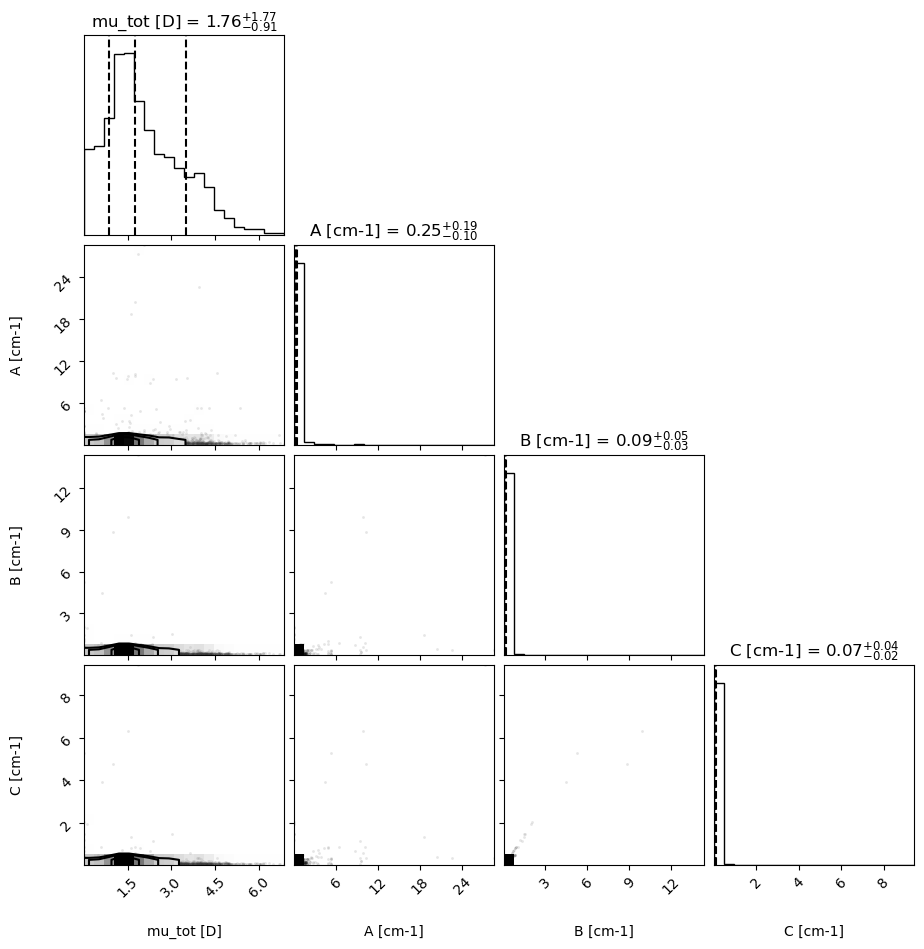

In [30]:
data = np.column_stack((df_ground['mu_tot [D]'].values,
df_ground['A [cm-1]'].values,
df_ground_less_six['B [cm-1]'].values,
df_ground['C [cm-1]'].values))
figure = corner.corner(data, 
                    labels = ['mu_tot [D]', 'A [cm-1]', 'B [cm-1]', 'C [cm-1]'],
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_kwargs={"fontsize": 12})
plt.show()

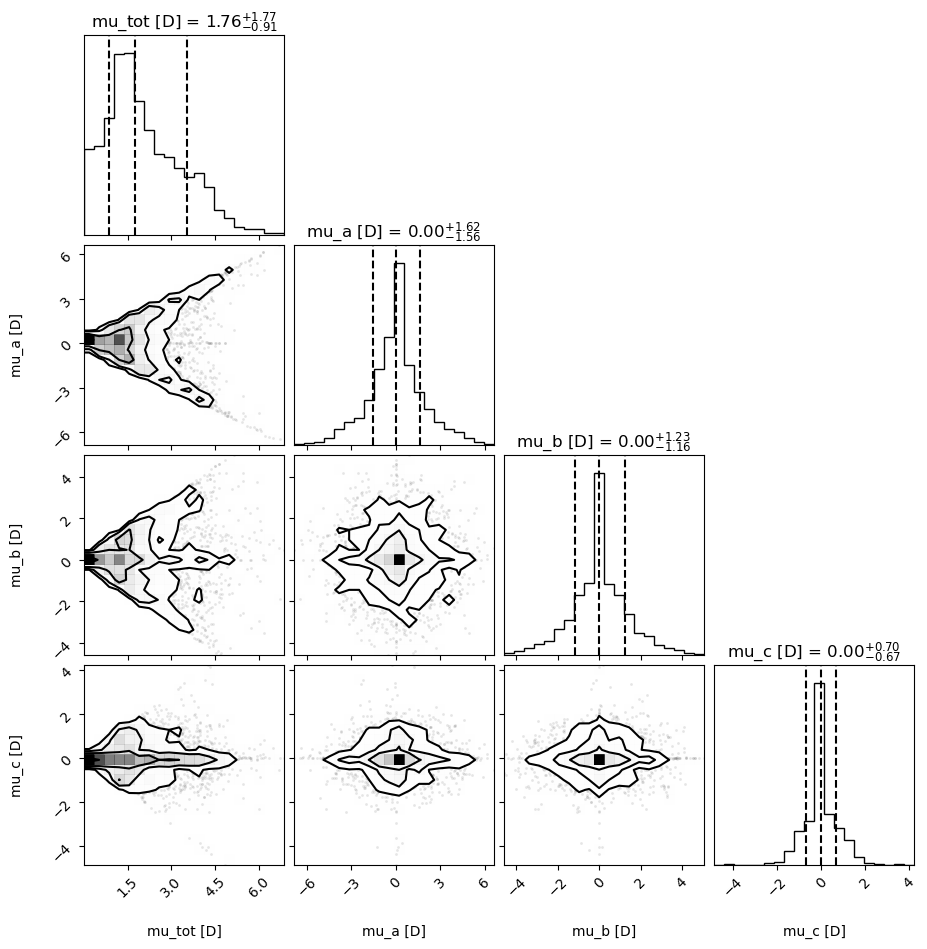

In [31]:
data = np.column_stack((df_ground['mu_tot [D]'].values,
df_ground['mu_a [D]'].values,
df_ground['mu_b [D]'].values,
df_ground['mu_c [D]'].values))
figure = corner.corner(data, 
                    labels = ['mu_tot [D]', 'mu_a [D]', 'mu_b [D]', 'mu_c [D]'],
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_kwargs={"fontsize": 12})
plt.show()

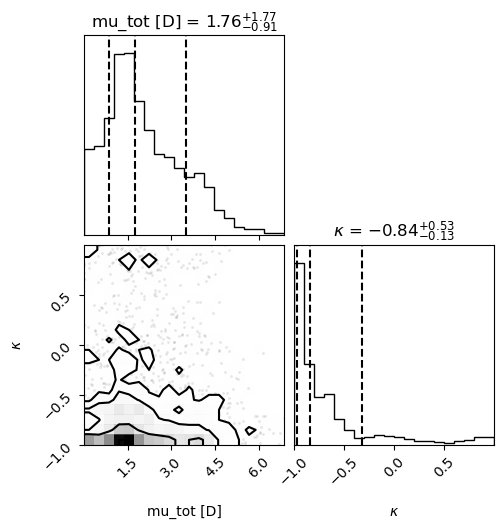

In [34]:
rays_asymm = (2*df_ground['B [cm-1]'].values - df_ground['A [cm-1]'].values - df_ground['C [cm-1]'].values)/(df_ground['A [cm-1]'].values - df_ground['C [cm-1]'].values)

data = np.column_stack((df_ground['mu_tot [D]'].values, 
                    rays_asymm))
figure = corner.corner(data, 
                    labels = ['mu_tot [D]', r'$\kappa$'],
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_kwargs={"fontsize": 12})
plt.show()

2743


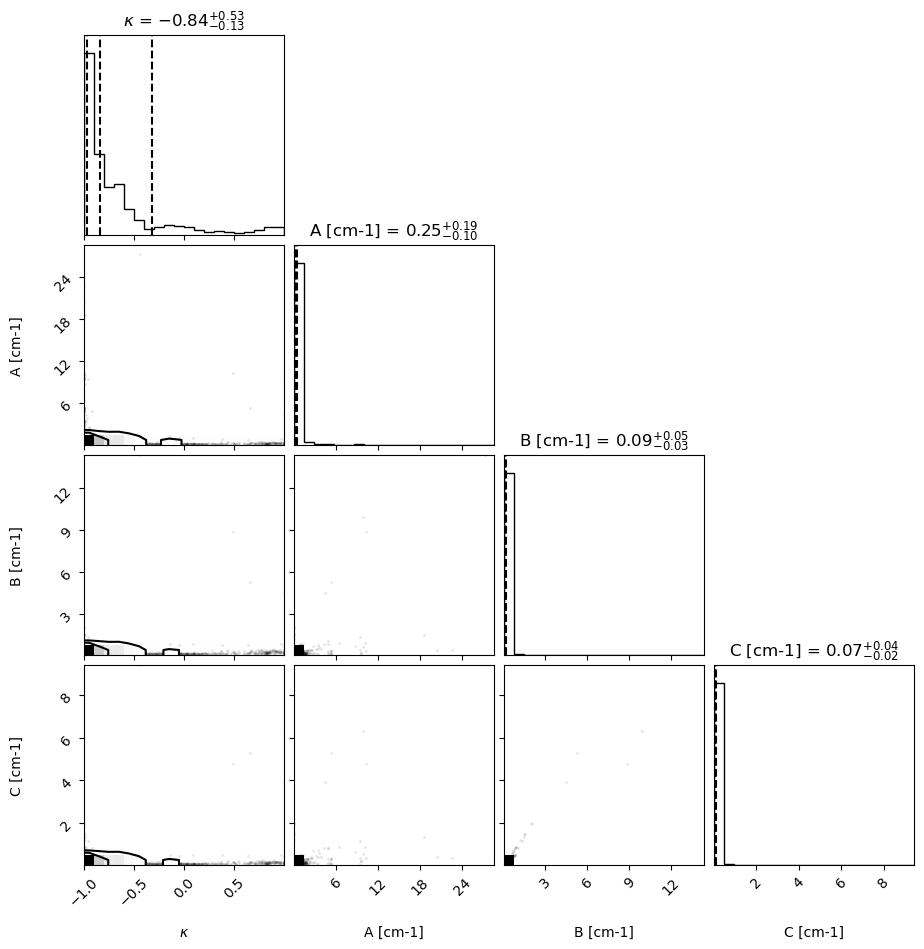

In [37]:
data = np.column_stack((rays_asymm,
df_ground['A [cm-1]'].values,
df_ground['B [cm-1]'].values,
df_ground['C [cm-1]'].values))

figure = corner.corner(data, 
                    labels = [r'$\kappa$', 'A [cm-1]', 'B [cm-1]', 'C [cm-1]'],
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_kwargs={"fontsize": 12})
plt.show()

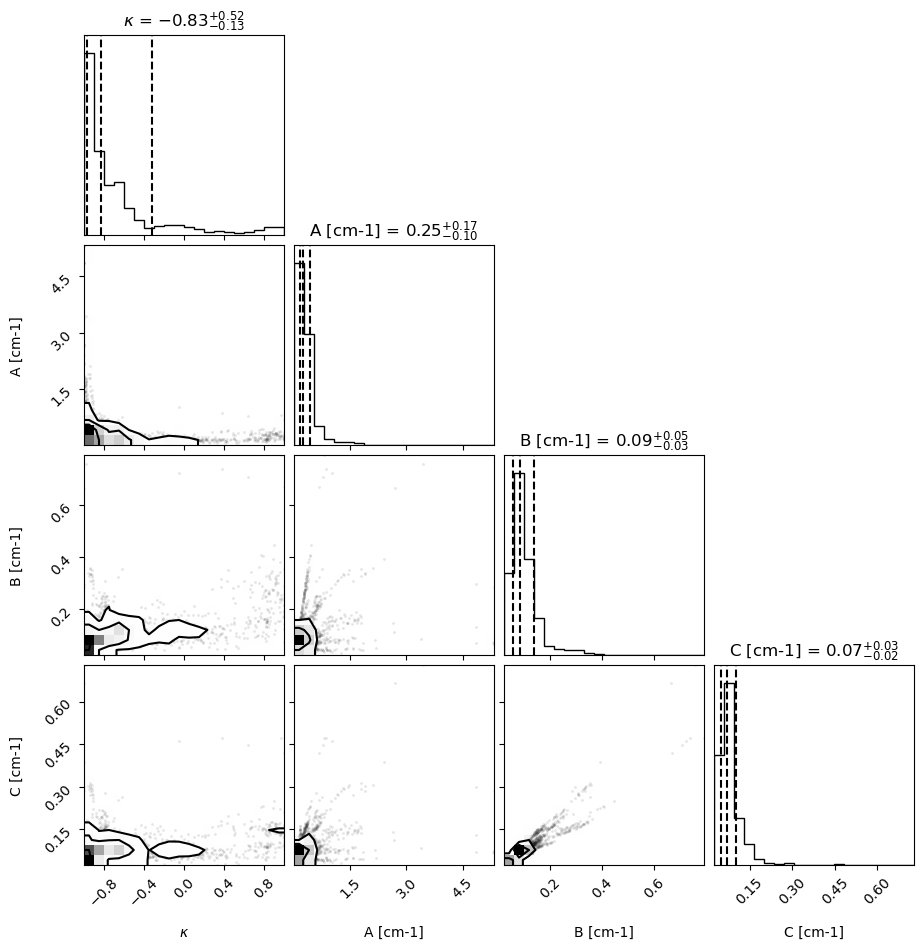

In [40]:
df_ground_less_six = df_ground[df_ground['# Atoms']>6]

rays_asymm = (2*df_ground_less_six['B [cm-1]'].values - df_ground_less_six['A [cm-1]'].values - df_ground_less_six['C [cm-1]'].values)/(df_ground_less_six['A [cm-1]'].values - df_ground_less_six['C [cm-1]'].values)

data = np.column_stack((rays_asymm,
df_ground_less_six['A [cm-1]'].values,
df_ground_less_six['B [cm-1]'].values,
df_ground_less_six['C [cm-1]'].values))

figure = corner.corner(data, 
                    labels = [r'$\kappa$', 'A [cm-1]', 'B [cm-1]', 'C [cm-1]'],
                    quantiles=[0.16, 0.5, 0.84],
                    show_titles=True,
                    title_kwargs={"fontsize": 12})
plt.show()